# LES ARBRES REMARQUABLES

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.svm import SVR
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso

# Data Reading & Data Cleaning

### Data Reading

In [2]:
df = pd.read_csv('arbres_remarquables.csv', sep=";")
df.sample(6)

,commune,domaine,code_insee,matricule,nom_francais,nom_latin,nb_sujet,annee_plantation,critere_general,critere_autre,hauteur,circonference,envergure,date_releve,description_etat_sanitaire,description_sol,photo_associee,photo,geo_shape,geo_point_2d
736,NEUILLY SUR SEINE,Domaine public,92051,3401,Platane commun. à feuille d'érable,Platanus x.acerifolia (Ait) Willd.,1,NaN,Pour ses dimensions,"Ecorce remarquable, Houppier naturel intact",26.0,6.40,21.0,2013-12-09,Vigoureux,Sol planté,oui,https://opendata.hauts-de-seine.fr/api/v2/cata...,"{""coordinates"": [2.2718890007, 48.8873399987],...","48.8873399987,2.27188900068"
681,NANTERRE,Domaine public affecté à un service public,92050,1684,Cèdre de l'Himalaya,Cedrus deodara (D.Don) G. Don,1,NaN,Général,NaN,22.0,2.80,22.0,2014-05-14,Vigoureux,Sol planté,oui,https://opendata.hauts-de-seine.fr/api/v2/cata...,"{""coordinates"": [2.2000839998, 48.8805499987],...","48.8805499987,2.20008399983"
839,GENNEVILLIERS,Domaine public,92036,1214,Cèdre bleu,Cedrus libani ssp. atlantica Battand. et Trabu...,1,NaN,Général,NaN,17.0,3.50,32.0,2014-03-12,Vigoureux,Pelouse,oui,https://opendata.hauts-de-seine.fr/api/v2/cata...,"{""coordinates"": [2.3048609999, 48.9307499992],...","48.9307499992,2.30486099994"
905,SCEAUX,Domaine public affecté à un service public,92071,92,Platane d'Orient,Platanus orientalis L.,1,NaN,Pour ses dimensions,Houppier naturel intact,26.0,4.70,21.0,2014-01-27,Vigoureux,Sol minéralisé,non,NaN,"{""coordinates"": [2.2877159998, 48.7770599991],...","48.7770599991,2.28771599983"
57,CLAMART,Domaine public,92023,1600,Chêne rouge d'Amérique,Quercus rubra L.,1,NaN,Pour son port,"Arbre d'avenir, Houppier naturel intact",28.0,2.00,29.0,2014-02-17,Vigoureux,Terre nue,non,NaN,"{""coordinates"": [2.2410649998, 48.7879499987],...","48.7879499987,2.24106499982"
575,NANTERRE,Domaine public affecté à un service public,92050,1679,Frêne,Fraxinus L.,1,NaN,Général,NaN,22.0,2.75,16.0,2014-05-14,Moyen,Pelouse,oui,https://opendata.hauts-de-seine.fr/api/v2/cata...,"{""coordinates"": [2.200397, 48.8811999989], ""ty...","48.8811999989,2.20039699996"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   commune                     1124 non-null   object 
 1   domaine                     1124 non-null   object 
 2   code_insee                  1124 non-null   int64  
 3   matricule                   1124 non-null   int64  
 4   nom_francais                1124 non-null   object 
 5   nom_latin                   1124 non-null   object 
 6   nb_sujet                    1124 non-null   int64  
 7   annee_plantation            163 non-null    float64
 8   critere_general             1124 non-null   object 
 9   critere_autre               654 non-null    object 
 10  hauteur                     1124 non-null   float64
 11  circonference               1124 non-null   float64
 12  envergure                   1124 non-null   float64
 13  date_releve                 1124 

In [4]:
df.describe()

,code_insee,matricule,nb_sujet,annee_plantation,hauteur,circonference,envergure
count,1124.000000,1124.000000,1124.000000,163.000000,1124.000000,1124.000000,1124.000000
mean,92045.258007,1896.344306,2.661032,1878.122699,23.181139,3.739084,19.023399
std,23.222053,1149.578363,16.578260,57.451619,7.314296,10.333736,6.116586
min,92002.000000,1.000000,1.000000,1700.000000,4.000000,0.530000,2.500000
25%,92023.000000,923.750000,1.000000,1850.000000,18.000000,2.567500,15.000000
50%,92048.000000,1807.500000,1.000000,1880.000000,24.000000,3.295000,19.000000
75%,92064.000000,3159.250000,1.000000,1910.000000,28.000000,3.950000,23.000000
max,92078.000000,3716.000000,350.000000,1988.000000,41.000000,345.000000,45.000000


In [5]:
df.nunique()

commune                         36
domaine                          9
code_insee                      36
matricule                     1124
nom_francais                   170
nom_latin                      170
nb_sujet                        27
annee_plantation                36
critere_general                  8
critere_autre                   41
hauteur                         71
circonference                  332
envergure                       65
date_releve                    182
description_etat_sanitaire       4
description_sol                  7
photo_associee                   2
photo                          639
geo_shape                     1124
geo_point_2d                  1124
dtype: int64

In [6]:
df.duplicated().any()

False

### Data Cleaning

In [7]:
df.drop(columns=['photo_associee', 'photo', 'geo_shape', 'geo_point_2d', 'critere_autre', 'matricule', 'nom_latin', 'code_insee'], inplace=True)

In [8]:
df.rename(columns={'nom_francais': 'nom_fr', 'nb_sujet': 'nb', 'annee_plantation': 'annee', 'circonference': 'circonf', 'description_etat_sanitaire': 'etat', 'description_sol': 'sol'}, inplace=True)

In [9]:
df['date_releve'] = pd.to_datetime(df['date_releve']).dt.year

In [10]:
df['age_releve'] = df['date_releve'] - df['annee']

In [11]:
df[['annee', 'age_releve']] = (df[['annee', 'age_releve']].fillna(0)).applymap(int)

In [12]:
df.sample(3)

,commune,domaine,nom_fr,nb,annee,critere_general,hauteur,circonf,envergure,date_releve,etat,sol,age_releve
664,RUEIL MALMAISON,Domaine public,Châtaignier,1,0,Pour sa situation,25.0,5.60,18.0,2014,Mauvais,Terre nue,0
617,MEUDON,Domaine public,Hêtre commun,1,0,Pour sa situation,30.0,3.24,15.0,2014,Moyen,Terre nue,0
1026,NANTERRE,Domaine public affecté à un service public,Platane commun. à feuille d'érable,1,0,Pour sa situation,23.0,2.70,21.0,2014,Vigoureux,Pelouse,0


In [13]:
df['sol'].value_counts()

Terre nue               392
Pelouse                 389
Terre piétinée          123
Sol planté              122
Sol minéralisé           94
(Inconnu)                 2
Niveau d'enracinemen      2
Name: sol, dtype: int64

In [14]:
df = df[df['sol'] != '(Inconnu)']
df = df[df['sol'] != 'Niveau d\'enracinemen']

In [15]:
df['circonf'].describe()

count    1120.000000
mean        3.742393
std        10.351850
min         0.530000
25%         2.570000
50%         3.300000
75%         3.950000
max       345.000000
Name: circonf, dtype: float64

In [16]:
sorted(df['circonf'], reverse=True)[0:10]

[345.0, 27.0, 26.0, 20.0, 14.2, 10.4, 10.01, 9.6, 9.5, 9.23]

In [17]:
df.loc[df['circonf'] == 345.0]

,commune,domaine,nom_fr,nb,annee,critere_general,hauteur,circonf,envergure,date_releve,etat,sol,age_releve
1007,NEUILLY SUR SEINE,Domaine public,Platane d'Orient,1,0,Pour ses dimensions,29.5,345.0,26.0,2013,Vigoureux,Sol minéralisé,0


________
##### Fonctions ayant pour but de trouver les outliers et les enlever du dataframe

In [18]:
def mustache(df, column):
    return sns.boxplot(data=df, x=column).set_title(f'Boîte à moustaches pour les données de la colonne {column}')

In [19]:
def IQR(df, column):
    Q1 = list(df[[column]].quantile(0.25))[0]
    Q3 = list(df[[column]].quantile(0.75))[0]
    IQR = Q3 - Q1
    mini = Q1 - (1.5*IQR)
    maxi = Q3 + (1.5*IQR)
    print(df[[column]].describe().loc[['min', 'max']])
    print(f'\n==> Everything that is less than {round(mini, 2)} and more than {round(maxi, 2)} is an outlier !!!')
    return mini, maxi

In [20]:
def drop_outliers(df, column, mini, maxi):
    df = df[df[column] < maxi]
    df = df[df[column] > mini]
    df.sample(3)
    print('New min and max values and number of rows :')
    print(df[column].describe().loc[['min', 'max', 'count']])
    return df

__________

### Outliers

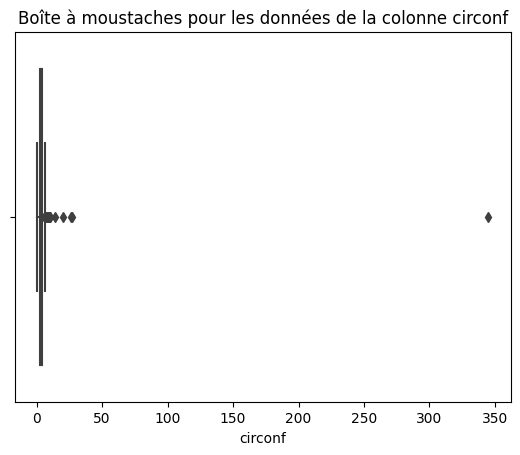

In [21]:
mustache(df, 'circonf');

In [22]:
mini_circonf, maxi_circonf = IQR(df, 'circonf')

     circonf
min     0.53
max   345.00

==> Everything that is less than 0.5 and more than 6.02 is an outlier !!!


In [23]:
df = drop_outliers(df, 'circonf', mini_circonf, maxi_circonf)

New min and max values and number of rows :
min         0.53
max         5.95
count    1068.00
Name: circonf, dtype: float64


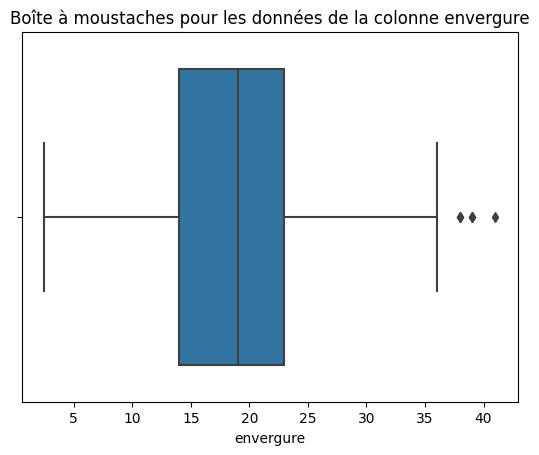

In [24]:
mustache(df, 'envergure');

In [25]:
mini_envergure, maxi_envergure = IQR(df, 'envergure')

     envergure
min        2.5
max       41.0

==> Everything that is less than 0.5 and more than 36.5 is an outlier !!!


In [26]:
df = drop_outliers(df, 'envergure', mini_envergure, maxi_envergure)

New min and max values and number of rows :
min         2.5
max        36.0
count    1063.0
Name: envergure, dtype: float64


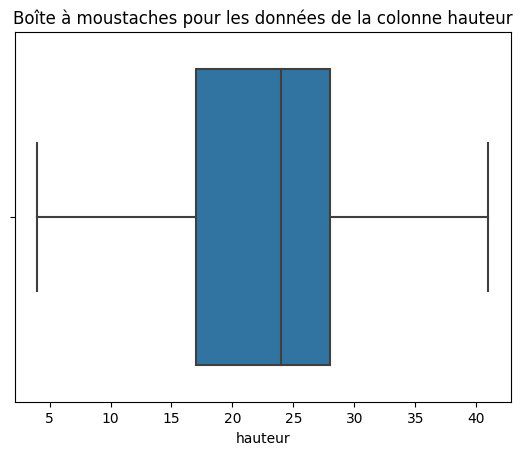

In [27]:
mustache(df, 'hauteur');

### Variables quantitatives

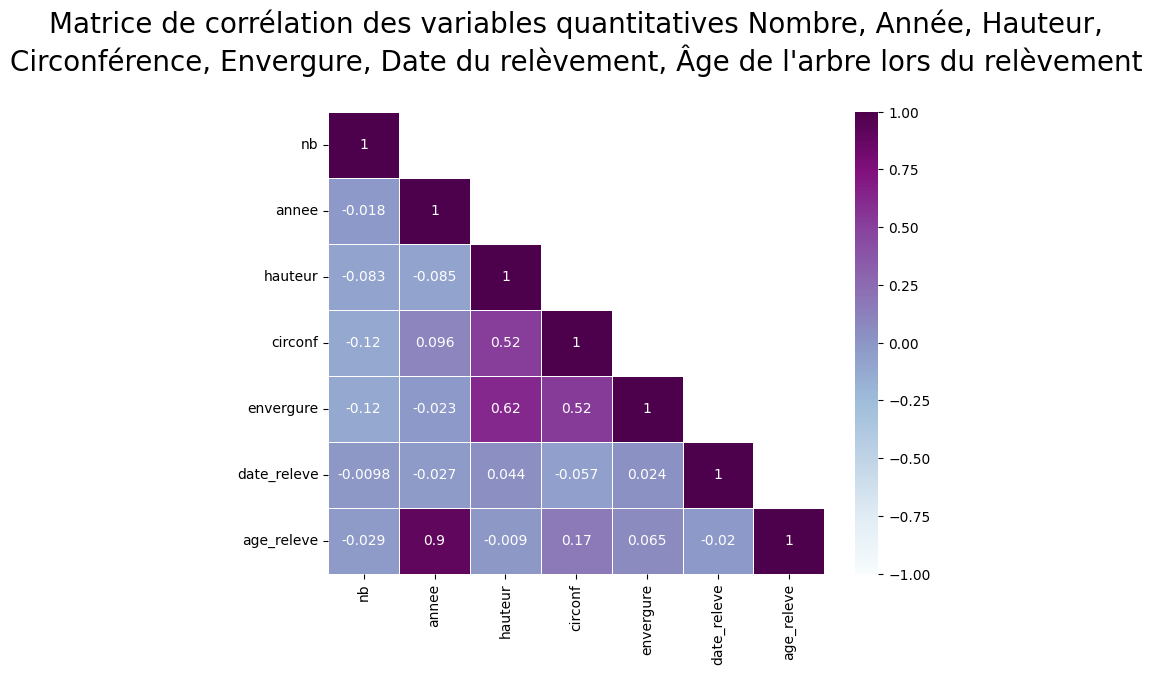

In [28]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.eye(mask.shape[0], dtype=bool)] = False

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, vmin=-1, vmax=1, linewidth = 0.5, cmap = 'BuPu', mask=mask, annot=True)
plt.title('Matrice de corrélation des variables quantitatives Nombre, Année, Hauteur,\nCirconférence, Envergure, Date du relèvement, Âge de l\'arbre lors du relèvement\n', fontsize=20)
plt.show()

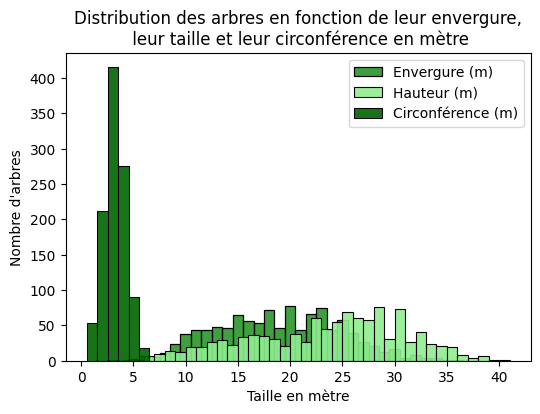

In [29]:
fig, ax = plt.subplots(figsize=(6,4))
x_h = df['hauteur']
x_c = df['circonf']
x_e = df['envergure']
sns.histplot(x_e, color='green', binwidth=1, label='Envergure (m)')
sns.histplot(x_h, alpha=0.9, color='lightgreen', binwidth=1, label='Hauteur (m)')
sns.histplot(x_c, alpha=0.9, color='darkgreen', binwidth=1, label='Circonférence (m)')
plt.xlabel('Taille en mètre')
plt.ylabel('Nombre d\'arbres')
plt.title('Distribution des arbres en fonction de leur envergure,\n leur taille et leur circonférence en mètre')
plt.legend()
plt.show()

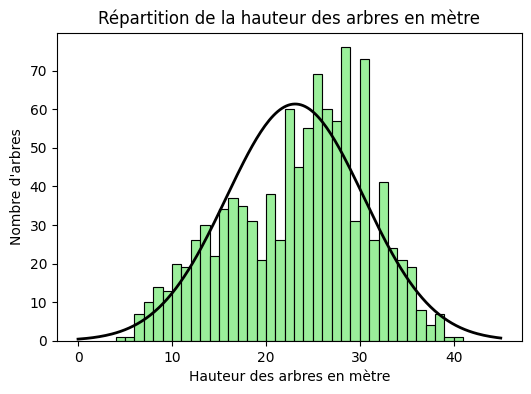

In [30]:
fig, ax = plt.subplots(figsize=(6, 4))

height = df['hauteur']
x = np.linspace(0, 45, 200)
num_bins = 35
#plt.hist(height, bins=num_bins)
sns.histplot(height, alpha=0.9, color='lightgreen', bins=num_bins, binwidth=1, label='Hauteur (m)')
bin_width = (height.max() - height.min()) / num_bins
p = norm.pdf(x, height.mean(), height.std())* len(height) * bin_width
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Hauteur des arbres en mètre')
plt.ylabel('Nombre d\'arbres')
plt.title('Répartition de la hauteur des arbres en mètre')
plt.show()

#print(f"The most frequent value is {list(height.mode())[0]} meters")

### Variables qualitatives

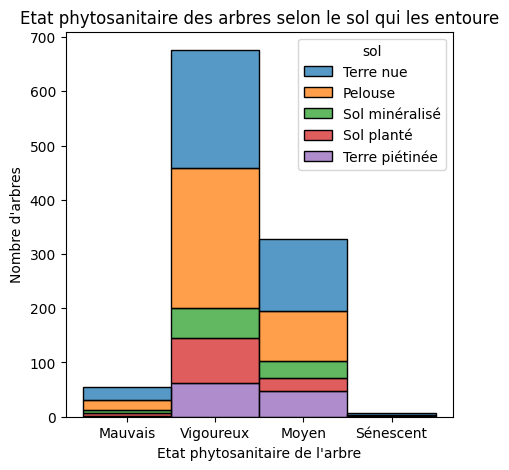

In [31]:
fig, ax = plt.subplots(figsize=(5, 5))

plot = sns.histplot(x="etat", hue="sol", data=df, stat="count", multiple="stack")
plot.set_title('Etat phytosanitaire des arbres selon le sol qui les entoure')
plot.set_xlabel('Etat phytosanitaire de l\'arbre')
plot.set_ylabel('Nombre d\'arbres');

In [32]:
df['etat'].value_counts()

Vigoureux    676
Moyen        327
Mauvais       54
Sénescent      6
Name: etat, dtype: int64

In [33]:
df_vigou = df[df['etat'] == 'Vigoureux']
df_moyen = df[df['etat'] == 'Moyen']
df_mauvais = df[df['etat'] == 'Mauvais']
df_sene = df[df['etat'] == 'Sénescent']

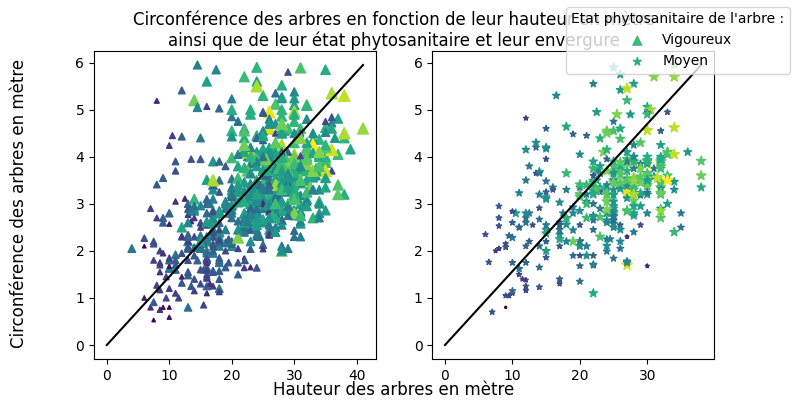

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))

axs[0].plot((0,df_vigou['hauteur'].max()), (0, df_vigou['circonf'].max()), color='black')
axs[0].scatter(df_vigou['hauteur'], df_vigou['circonf'], s=df_vigou['envergure']**1.2, c=df_vigou['envergure'], marker='^', label='Vigoureux')
axs[1].plot((0,df_moyen['hauteur'].max()), (0, df_moyen['circonf'].max()), color='black') #color='gold', edgecolors='darkorange'
axs[1].scatter(df_moyen['hauteur'], df_moyen['circonf'], s=df_moyen['envergure']**1.2, c=df_moyen['envergure'], marker='*', label='Moyen')
fig.supxlabel('Hauteur des arbres en mètre')
fig.supylabel('Circonférence des arbres en mètre')
fig.suptitle('Circonférence des arbres en fonction de leur hauteur en mètre\nainsi que de leur état phytosanitaire et leur envergure')
fig.legend(title='Etat phytosanitaire de l\'arbre :')
plt.show()

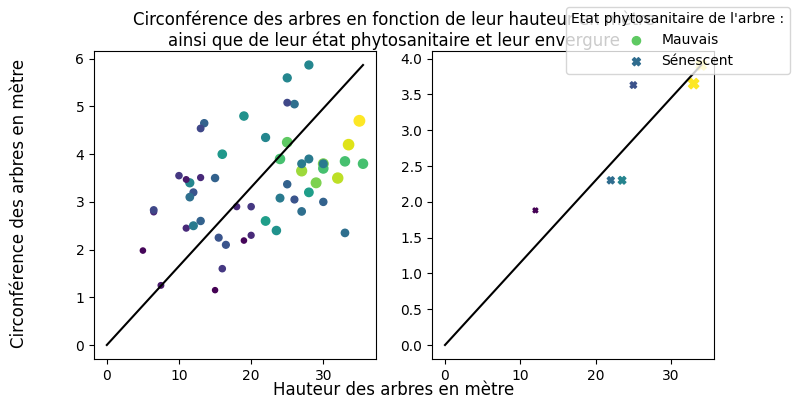

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))

axs[0].plot((0,df_mauvais['hauteur'].max()), (0, df_mauvais['circonf'].max()), color='black') #color='red', edgecolors='darkred'
axs[0].scatter(df_mauvais['hauteur'], df_mauvais['circonf'], s=df_mauvais['envergure']**1.2, c=df_mauvais['envergure'], marker='o', label='Mauvais')
axs[1].plot((0,df_sene['hauteur'].max()), (0, df_sene['circonf'].max()), color='black') #color='black', edgecolors='black'
axs[1].scatter(df_sene['hauteur'], df_sene['circonf'], s=df_sene['envergure']**1.2, c=df_sene['envergure'], marker='X', label='Sénescent')
fig.supxlabel('Hauteur des arbres en mètre')
fig.supylabel('Circonférence des arbres en mètre')
fig.suptitle('Circonférence des arbres en fonction de leur hauteur en mètre\nainsi que de leur état phytosanitaire et leur envergure')
fig.legend(title='Etat phytosanitaire de l\'arbre :')
plt.show()

In [36]:
#fig, ax = plt.subplots(figsize=(9,6))

#plot = sns.countplot(data=df, x='commune')
#plot.set_xticklabels(plot.get_xticklabels(), rotation=85)
#plt.xlabel('Communes des Hauts-de-Seine')
#plt.ylabel('Nombre d\'arbre')
#plt.title('Répartition des arbres selon la commune')
#plt.show()

In [37]:
#df2 = df[df['age_releve'] != 0]

#### Target et features

In [38]:
X = df[['circonf', 'envergure', 'nom_fr', 'etat', 'sol', 'commune']]
y = df['hauteur']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [40]:
num_pipeline = Pipeline([('imputer', SimpleImputer()), ('scaler', MinMaxScaler())])

cat_transformer = OneHotEncoder(handle_unknown='ignore')

columntransformer = ColumnTransformer([
    ('num_transformer', num_pipeline, ['circonf', 'envergure']), #'nb', 'annee', 
    ('cat_transformer', cat_transformer, ['commune', 'nom_fr', 'etat', 'sol']) #'domaine', 'critere_general', 
    ]
)

In [41]:
lr = LinearRegression()
net = ElasticNet(l1_ratio=0.2)
lasso = Lasso(alpha=0.3)
ridge = Ridge(alpha=0.9)
svregres = SVR(kernel='rbf')

In [42]:
pip = make_pipeline(columntransformer, ridge)

#### Entraînement de la donnée 

In [43]:
pip.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['circonf', 'envergure']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['commune', 'nom_fr', 'etat',
                                                   'sol'])])),
                ('ridge', Ridge(alpha=0.9))])

#### Score du R²

In [44]:
pip.score(X_test, y_test)

0.7120010183611694

#### Prédiction du modèle

In [45]:
y_pred = pip.predict(X_test)

#### Les résidus

In [46]:
res = y_pred - y_test
res

107     1.004933
841    -6.251023
488     7.052343
561     6.586723
362    -1.831540
          ...   
1058   -0.594977
1081   -0.249157
477     2.248969
450    -5.347683
787     5.605240
Name: hauteur, Length: 213, dtype: float64

In [47]:
#plt.boxplot(res)
#plt.title('Boîte à moustache des résidus')
#plt.show()

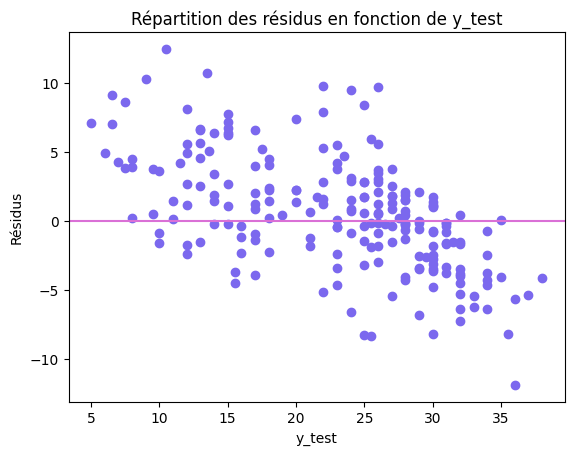

In [48]:
plt.scatter(y_test, res, color='mediumslateblue')
plt.axhline(y=0, color='orchid')
plt.xlabel('y_test')
plt.ylabel('Résidus')
plt.title('Répartition des résidus en fonction de y_test')
plt.show()

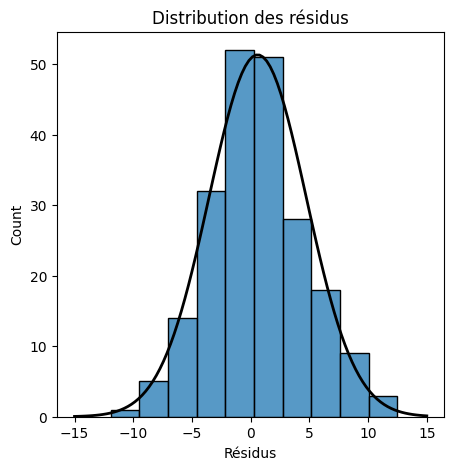

In [49]:
fig, ax = plt.subplots(figsize=(5,5))

x = np.linspace(-15, 15, 100)
p = norm.pdf(x, res.mean(), res.std())* len(res) * 2.5

sns.histplot(res, bins=10); # you may select the no. of bins
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribution des résidus')           
plt.xlabel('Résidus')     
plt.show()

In [50]:
p_value = stats.pearsonr(y_test, y_pred) # y_pred ou res
p_value[1]

4.943193190669739e-60

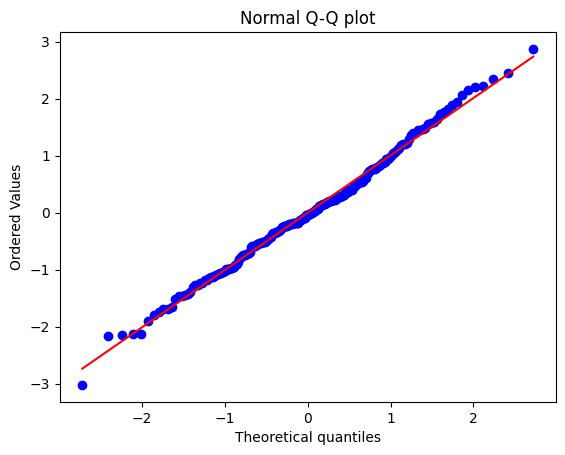

In [51]:
z = (res - res.mean())/res.std(ddof=1)
stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

In [52]:
pickle.dump(pip, open('trees.pkl', 'wb'))

In [53]:
pickled_model = pickle.load(open('trees.pkl', 'rb'))

In [54]:
pickled_model.score(X_test, y_test)

0.7120010183611694

=> uvicorn fast:app --reload

#### Cross Validation

In [55]:
cross_val_score(pip, X_train, y_train)#.mean()

array([0.63885997, 0.66415075, 0.60847359, 0.57577042, 0.65078061])